In [15]:
import pandas as pd
import sqlite3
import zipfile

In [16]:
! pwd

/Users/imanithompson/Documents/Flatiron/Project/Movie-Data-Analysis-Project/Notebooks/Imani


In [17]:
! ls ../../zippedData/

bom.movie_gross.csv.gz  rt.movie_info.tsv.gz    tn.movie_budgets.csv.gz
im.db                   rt.reviews.tsv.gz
im.db.zip               tmdb.movies.csv.gz


# tmdb.movies.csv.gz

In [18]:
tm = pd.read_csv("../../zippedData/tmdb.movies.csv.gz")
tm

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [19]:
tm.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

# tn.movie_budgets.csv.gz

In [20]:
tn = pd.read_csv('../../zippedData/tn.movie_budgets.csv.gz')
tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [21]:
tn.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

# bom.movie_gross.csv.gz

In [22]:
bom = pd.read_csv('../../zippedData/bom.movie_gross.csv.gz')
bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [23]:
bom.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

# im.db

In [24]:
!ls ../../zippedData/

bom.movie_gross.csv.gz  rt.movie_info.tsv.gz    tn.movie_budgets.csv.gz
im.db                   rt.reviews.tsv.gz
im.db.zip               tmdb.movies.csv.gz


In [25]:
# import zipfile
with zipfile.ZipFile("../../zippedData/im.db") as zip_ref:
    zip_ref.extractall("../../zippedData/im.db")

BadZipFile: File is not a zip file

In [26]:
conn = sqlite3.connect("../../zippedData/im.db")

In [27]:
cursor = conn.cursor()

In [28]:
schema_df = pd.read_sql('''
SELECT * 
FROM sqlite_master
''', conn)
schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [29]:
print(schema_df['sql'][4])

CREATE TABLE "movie_ratings" (
"movie_id" TEXT,
  "averagerating" REAL,
  "numvotes" INTEGER
)


In [30]:
joinn = '''
SELECT --DISTINCT b.primary_title,
    b.genres, 
    AVG(b.runtime_minutes) AS runtime,
    AVG(r.averagerating) AS rating,
    sum(r.numvotes) AS votenum
FROM movie_basics AS b
INNER JOIN movie_ratings AS r
    ON b.movie_id = r.movie_id
WHERE b.genres IS "Drama" OR b.genres IS "Comedy" OR b.genres IS "Documentary" OR
    b.genres IS "Horror" OR b.genres IS "Thriller" OR b.genres IS "Action" OR 
    b.genres IS "Family" OR b.genres IS "Romance" OR b.genres IS "Animation" OR 
    b.genres IS "Sci-Fi" OR b.genres IS "Crime" OR b.genres IS "Mystery" OR
    b.genres IS "Music" OR b.genres IS "Adventure" OR b.genres IS "Biography" OR 
    b.genres IS "Fantasy" OR b.genres IS "History"
GROUP BY b.genres
--HAVING r.numvotes > 10
ORDER BY r.averagerating DESC, r.numvotes DESC
'''
imdb_genre = pd.read_sql(joinn, conn)
imdb_genre

,genres,runtime,rating,votenum
0,Music,102.213235,7.615341,23980
1,Adventure,93.894737,6.272727,18809
2,Family,90.210024,6.078004,50028
3,Documentary,88.942179,7.293794,1785513
4,Drama,97.633723,6.494265,8395521
5,Thriller,94.880435,5.704244,440564
6,Sci-Fi,89.242553,5.440678,49368
7,Animation,81.901060,5.908621,26477
8,Mystery,97.100671,6.361376,15692
9,Fantasy,91.353448,6.201361,28141


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## bar graph of individual genres compared to average ratings
## average ratings of individual genres

''

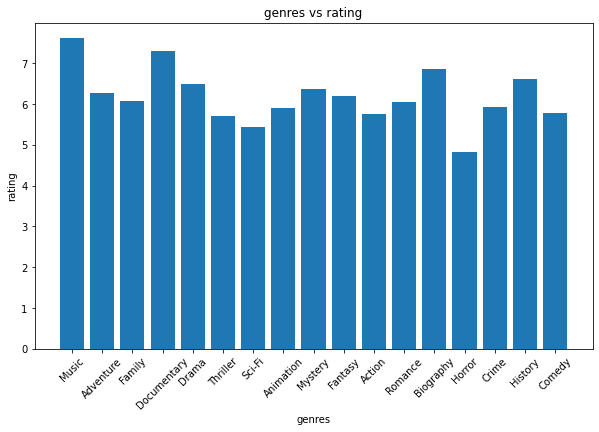

In [32]:
fig, ax =plt.subplots(figsize = (10,6))
x = imdb_genre['genres']
y = imdb_genre['rating']
ax.bar(x,y)
ax.set_xlabel('genres')
ax.set_ylabel('rating')
ax.set_title('genres vs rating')
plt.xticks(rotation = 45)
;


# graph is showing: individual genre and avg rating 
- not much variation between genres and ratings 

In [33]:
imdb_genre[['genres', 'rating', 'runtime']]

,genres,rating,runtime
0,Music,7.615341,102.213235
1,Adventure,6.272727,93.894737
2,Family,6.078004,90.210024
3,Documentary,7.293794,88.942179
4,Drama,6.494265,97.633723
5,Thriller,5.704244,94.880435
6,Sci-Fi,5.440678,89.242553
7,Animation,5.908621,81.901060
8,Mystery,6.361376,97.100671
9,Fantasy,6.201361,91.353448


## rating vs runtime per genre 
- colors not easy to read 

/Users/imanithompson/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


''

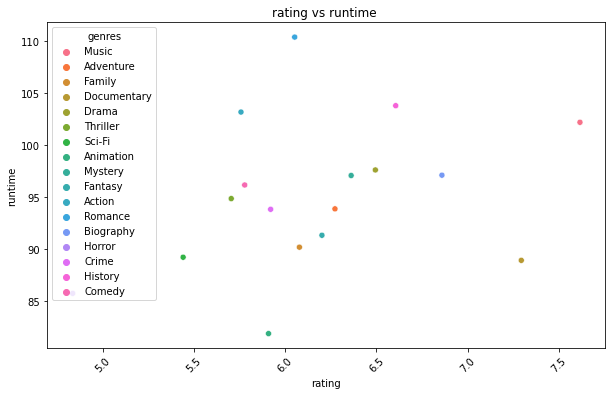

In [34]:
fig, ax =plt.subplots(figsize = (10,6))
x = imdb_genre['rating']
y = imdb_genre['runtime']
sns.scatterplot(x,y,hue = imdb_genre['genres'] )
ax.set_xlabel('rating')
ax.set_ylabel('runtime')
ax.set_title('rating vs runtime ')
plt.xticks(rotation = 45)
;

## comparing rating to avg run time per genre
- can be like hey these length movies have highest ratings so prehaps liked the most or movie genres this length are most popular


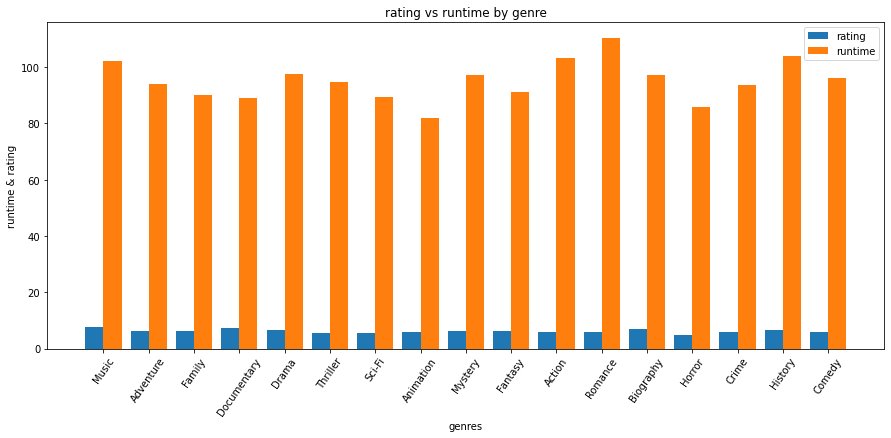

In [35]:

plt.figure(figsize=(15,6))
X = imdb_genre['genres'].values
xrating = imdb_genre['rating']
yruntime = imdb_genre['runtime']
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, xrating, 0.4, label = 'rating')
plt.bar(X_axis + 0.2, yruntime, 0.4, label = 'runtime')
plt.xticks(X_axis, X,rotation =55)
plt.xlabel("genres")
plt.ylabel("runtime & rating")
plt.title("rating vs runtime by genre")
plt.legend()
plt.show()

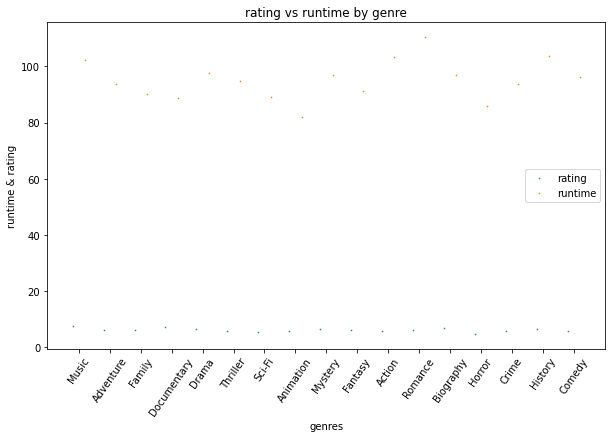

In [36]:

plt.figure(figsize=(10,6))
X = imdb_genre['genres'].values
xrating = imdb_genre['rating']
yruntime = imdb_genre['runtime']
X_axis = np.arange(len(X))
plt.scatter(X_axis - 0.2, xrating, 0.4, label = 'rating')
plt.scatter(X_axis + 0.2, yruntime, 0.4, label = 'runtime')
plt.xticks(X_axis, X,rotation =55)
plt.xlabel("genres")
plt.ylabel("runtime & rating")
plt.title("rating vs runtime by genre")
plt.legend()
plt.show()

In [37]:
imdb_genre.head()

,genres,runtime,rating,votenum
0,Music,102.213235,7.615341,23980
1,Adventure,93.894737,6.272727,18809
2,Family,90.210024,6.078004,50028
3,Documentary,88.942179,7.293794,1785513
4,Drama,97.633723,6.494265,8395521


In [38]:

    
pd.read_sql('''
SELECT DISTINCT b.primary_title,
    b.genres, 
    b.runtime_minutes,
    r.averagerating,
    r.numvotes
FROM movie_basics AS b
INNER JOIN movie_ratings AS r
    ON b.movie_id = r.movie_id
WHERE b.genres IS "Drama" OR b.genres IS "Comedy" OR b.genres IS "Documentary" OR
    b.genres IS "Horror" OR b.genres IS "Thriller" OR b.genres IS "Action" OR 
    b.genres IS "Family" OR b.genres IS "Romance" OR b.genres IS "Animation" OR 
    b.genres IS "Sci-Fi" OR b.genres IS "Crime" OR b.genres IS "Mystery" OR
    b.genres IS "Music" OR b.genres IS "Adventure" OR b.genres IS "Biography" OR 
    b.genres IS "Fantasy" OR b.genres IS "History"
ORDER BY r.averagerating DESC, r.numvotes DESC


''',conn)

,primary_title,genres,runtime_minutes,averagerating,numvotes
0,Renegade,Documentary,NaN,10.0,20
1,Revolution Food,Documentary,70.0,10.0,8
2,Fly High: Story of the Disc Dog,Documentary,65.0,10.0,7
3,I Was Born Yesterday!,Documentary,31.0,10.0,6
4,All Around Us,Documentary,NaN,10.0,6
...,...,...,...,...,...
35835,Tachiiri kinshi Haittara shinu? Norowareta 5 hen,Horror,61.0,1.0,6
35836,Momok jangan cari pasal!,Comedy,85.0,1.0,5
35837,Jak se mori revizori,Comedy,NaN,1.0,5
35838,Pup Scouts,Animation,72.0,1.0,5


In [39]:
imdb_genre['genres'] = imdb_genre['genres'].str.split(',')
imdb_genre['genres']

0           [Music]
1       [Adventure]
2          [Family]
3     [Documentary]
4           [Drama]
5        [Thriller]
6          [Sci-Fi]
7       [Animation]
8         [Mystery]
9         [Fantasy]
10         [Action]
11        [Romance]
12      [Biography]
13         [Horror]
14          [Crime]
15        [History]
16         [Comedy]
Name: genres, dtype: object

# The top 20 genre value counts
- shows genres that are used more freq

In [40]:
imdb_genre['genres'].value_counts()[:20]

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Animation]      1
[Drama]          1
[Action]         1
[Fantasy]        1
[Family]         1
[History]        1
[Mystery]        1
[Thriller]       1
[Comedy]         1
[Romance]        1
[Sci-Fi]         1
[Biography]      1
[Adventure]      1
[Music]          1
[Horror]         1
[Documentary]    1
[Crime]          1
Name: genres, dtype: int64

## list of single genre categories alone
- Drama
- Documentary 
- Comedy
- Horror
- Thriller
- Action
- Romance
- Family
- Animation
- Sci-Fi
- Crime
- Mystery
- Music
- Adventure
- Biography
- Fantasy
- History

## Another sql but adding in directors - directors you might want to hire
- only showing avg rating >8.0 because i feel like a great movie is at least a 8/10 rating

In [42]:
join_director = '''
SELECT  DISTINCT b.primary_title,
    b.genres, 
    r.averagerating,
    r.numvotes,
    p.primary_name AS "director name"
FROM movie_basics AS b
JOIN movie_ratings AS r
    ON b.movie_id = r.movie_id
JOIN directors AS d
    ON d.movie_id = r.movie_id 
JOIN persons AS p
    ON p.person_id = d.person_id
--WHERE r.averagerating > 8.0 AND numvotes >3500
'''
imdb_directors = pd.read_sql(join_director, conn)
imdb_directors

,primary_title,genres,averagerating,numvotes,director name
0,Sunghursh,"Action,Crime,Drama",7.0,77,Harnam Singh Rawail
1,One Day Before the Rainy Season,"Biography,Drama",7.2,43,Mani Kaul
2,The Other Side of the Wind,Drama,6.9,4517,Orson Welles
3,Sabse Bada Sukh,"Comedy,Drama",6.1,13,Hrishikesh Mukherjee
4,The Wandering Soap Opera,"Comedy,Drama,Fantasy",6.5,119,Raoul Ruiz
...,...,...,...,...,...
85945,Diabolik sono io,Documentary,6.2,6,Giancarlo Soldi
85946,Sokagin Çocuklari,"Drama,Family",8.7,136,Ahmet Faik Akinci
85947,Albatross,Documentary,8.5,8,Chris Jordan
85948,La vida sense la Sara Amat,None,6.6,5,Laura Jou


In [43]:
imdb_directors['primary_title'].value_counts()

World of Death                                       83
Venice 70: Future Reloaded                           73
Milano 55,1. Cronaca di una settimana di passioni    63
60 Seconds to Die                                    61
Our RoboCop Remake                                   59
                                                     ..
Dreamcatchers                                         1
Japan's Tragedy                                       1
Hija                                                  1
Tödliche Gefühle                                      1
Alicia's Dream                                        1
Name: primary_title, Length: 69285, dtype: int64

-used to get the avg amount of votes

In [44]:
get_mean = pd.read_sql('''
SELECT *
FROM movie_ratings
''', conn)

In [45]:
get_mean['numvotes'].describe()

count    7.385600e+04
mean     3.523662e+03
std      3.029402e+04
min      5.000000e+00
25%      1.400000e+01
50%      4.900000e+01
75%      2.820000e+02
max      1.841066e+06
Name: numvotes, dtype: float64

In [46]:
imdb_directors['numvotes'].max()

1841066

## attempt to make visuals w/ directors 
- could make a barplot with 2 x axis, 1 showing for example top 5 directors w/ highest rating and 1 showing bottoom 5 directors
- maybe director and rating not enough so is possible join this csv that has gross income of money and show this directors make works that produce alot of money

In [47]:
pd.read_sql('''
SELECT b.genres, 
    b.runtime_minutes,
    r.averagerating,
    r.numvotes,
    p.primary_name
FROM movie_basics AS b
JOIN movie_ratings AS r
    ON b.movie_id = r.movie_id
JOIN directors AS d
    ON d.movie_id = r.movie_id 
JOIN persons AS p
    ON p.person_id = d.person_id
''',conn)

pd.read_sql('''
SELECT --DISTINCT b.primary_title,
    b.genres, 
    AVG(b.runtime_minutes) AS runtime,
    AVG(r.averagerating) AS rating,
    sum(r.numvotes) AS votenum,
    d.person_id
FROM movie_basics AS b
INNER JOIN movie_ratings AS r
    ON b.movie_id = r.movie_id
INNER JOIN directors AS d
    ON b.movie_id = d.movie_id
--WHERE b.genres IS "Drama" OR b.genres IS "Comedy" OR b.genres IS "Documentary" OR
    b.genres IS "Horror" OR b.genres IS "Thriller" OR b.genres IS "Action" OR 
    b.genres IS "Family" OR b.genres IS "Romance" OR b.genres IS "Animation" OR 
    b.genres IS "Sci-Fi" OR b.genres IS "Crime" OR b.genres IS "Mystery" OR
    b.genres IS "Music" OR b.genres IS "Adventure" OR b.genres IS "Biography" OR 
    b.genres IS "Fantasy" OR b.genres IS "History"
GROUP BY b.genres
--HAVING r.numvotes > 10
ORDER BY r.averagerating DESC, r.numvotes DESC
''',conn)

DatabaseError: Execution failed on sql '
SELECT --DISTINCT b.primary_title,
    b.genres, 
    AVG(b.runtime_minutes) AS runtime,
    AVG(r.averagerating) AS rating,
    sum(r.numvotes) AS votenum,
    d.person_id
FROM movie_basics AS b
INNER JOIN movie_ratings AS r
    ON b.movie_id = r.movie_id
INNER JOIN directors AS d
    ON b.movie_id = d.movie_id
--WHERE b.genres IS "Drama" OR b.genres IS "Comedy" OR b.genres IS "Documentary" OR
    b.genres IS "Horror" OR b.genres IS "Thriller" OR b.genres IS "Action" OR 
    b.genres IS "Family" OR b.genres IS "Romance" OR b.genres IS "Animation" OR 
    b.genres IS "Sci-Fi" OR b.genres IS "Crime" OR b.genres IS "Mystery" OR
    b.genres IS "Music" OR b.genres IS "Adventure" OR b.genres IS "Biography" OR 
    b.genres IS "Fantasy" OR b.genres IS "History"
GROUP BY b.genres
--HAVING r.numvotes > 10
ORDER BY r.averagerating DESC, r.numvotes DESC
': near "b": syntax error

In [ ]:
pd.read_sql('''
SELECT b.primary_title,
    b.genres, 
    b.runtime_minutes,
    r.averagerating,
    r.numvotes,
    p.primary_name
FROM movie_basics AS b
JOIN movie_ratings AS r
    ON b.movie_id = r.movie_id
JOIN directors AS d
    ON d.movie_id = r.movie_id 
JOIN persons AS p
    ON p.person_id = d.person_id''',conn)

In [ ]:
tn.head()

In [ ]:
tn.to_sql()